In [19]:
!pip install nltk
!pip install -q wordcloud
!pip install matplotlib
!pip install vaderSentiment

# Imports

In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

# Wordcloud For Train2Data Dataset

In [4]:
stop = stopwords.words('english')

df = pd.read_csv("./datasets/train2Data.csv", encoding="utf-8", sep=',')

df.rename(columns={'Tweets': 'text', ' Label': 'label'}, inplace=True)

#Remove stopwords from the dataset
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['text']= df['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in ['amp', 'quot']]))


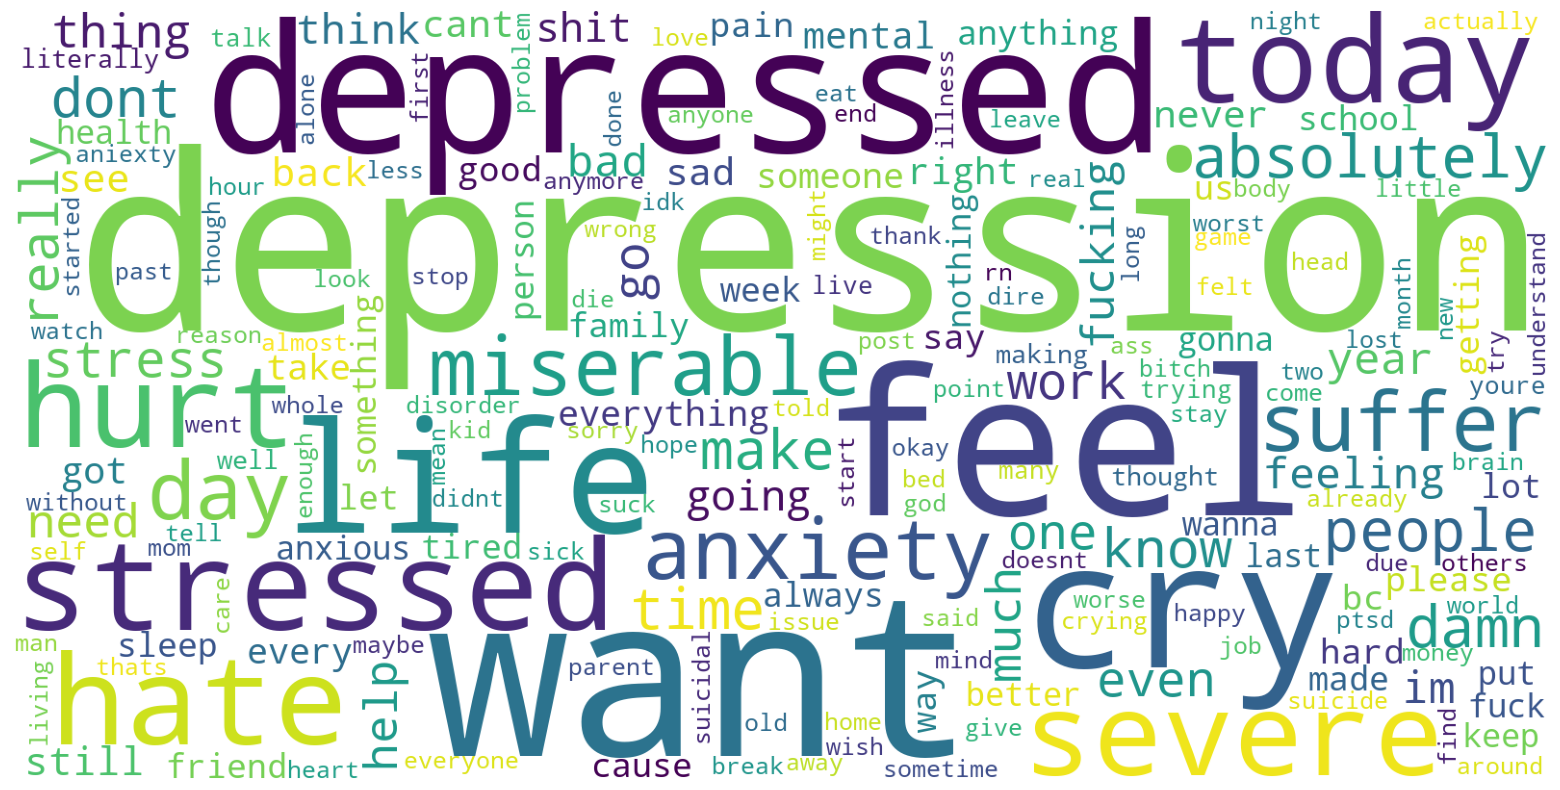

In [24]:

depressed_df = df[df['label'] == 1]

depressed_df.head(10)

text = depressed_df['text'].values
text= ''.join(text)

wordcloud = WordCloud(collocations = False, background_color = 'white', width=1600, height=800).generate(str(text))
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud);

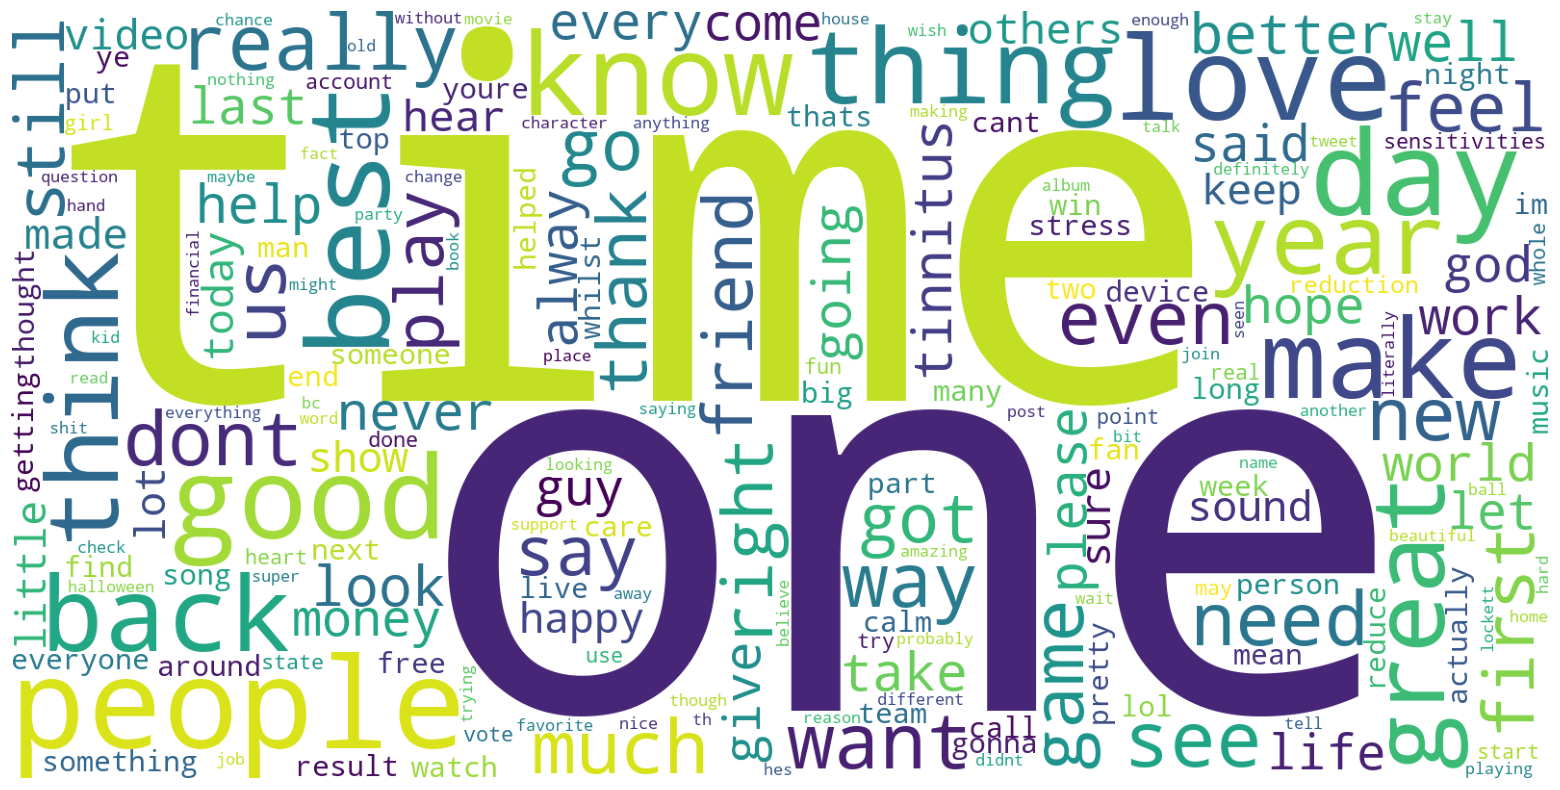

In [25]:
non_depressed = df[df['label'] == 0]

text = non_depressed['text'].values

text= ''.join(text)

wordcloud = WordCloud(collocations = False, background_color = 'white', width=1600, height=800).generate(str(text))
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud);

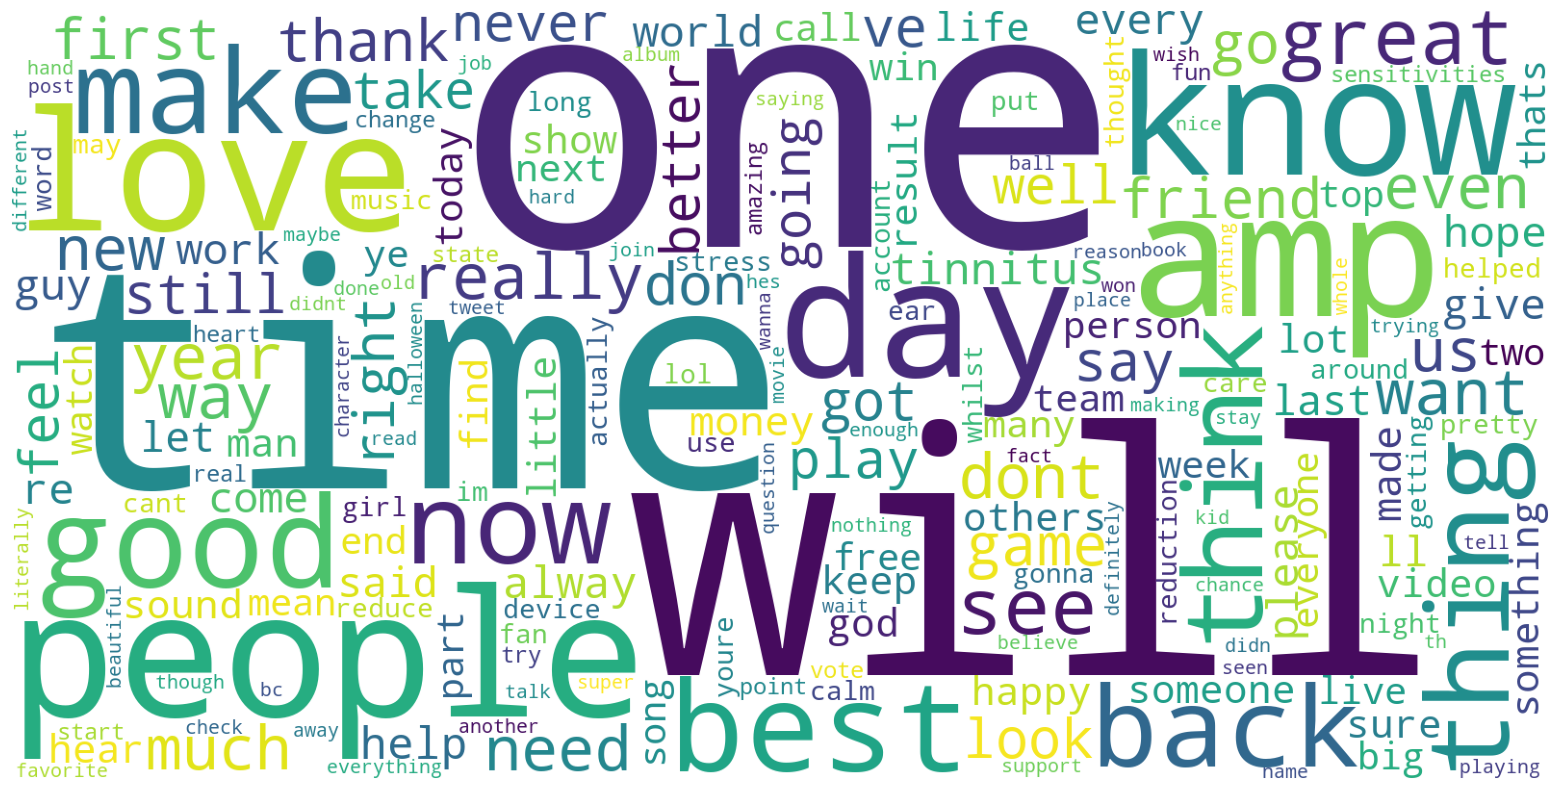

C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\2538212399.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'negative'] = sentiment['neg']
C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\2538212399.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'neutral'] = sentiment['neu']
C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\2538212399.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

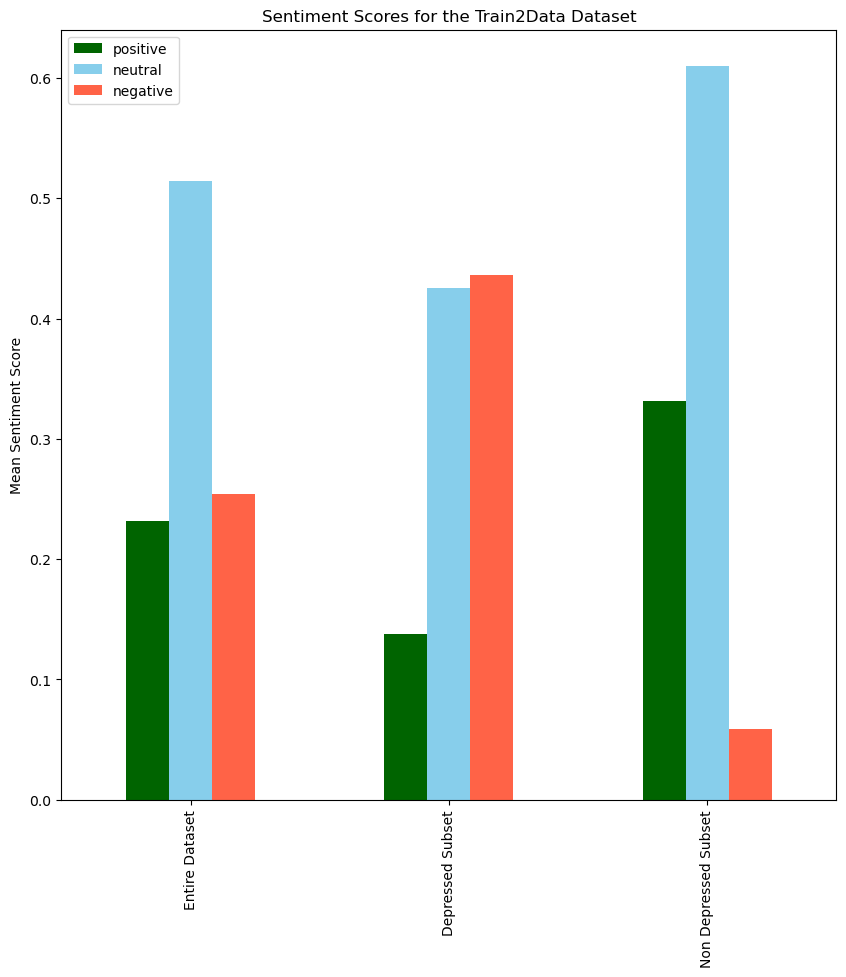

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

non_depressed_df = df[df['label'] == 0]

analyzer = SentimentIntensityAnalyzer()

for index, row in non_depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    non_depressed_df.at[index, 'negative'] = sentiment['neg']
    non_depressed_df.at[index, 'neutral'] = sentiment['neu']
    non_depressed_df.at[index, 'positive'] = sentiment['pos']
    non_depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
non_depressed_negative_mean = non_depressed_df.loc[:, 'negative'].mean()
non_depressed_neutral_mean = non_depressed_df.loc[:, 'neutral'].mean()
non_depressed_positive_mean = non_depressed_df.loc[:, 'positive'].mean()
non_depressed_compound_mean = non_depressed_df.loc[:, 'compound'].mean()


depressed_df = df[df['label'] == 1]

for index, row in depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    depressed_df.at[index, 'negative'] = sentiment['neg']
    depressed_df.at[index, 'neutral'] = sentiment['neu']
    depressed_df.at[index, 'positive'] = sentiment['pos']
    depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the depressed dataset
depressed_negative_mean = depressed_df.loc[:, 'negative'].mean()
depressed_neutral_mean = depressed_df.loc[:, 'neutral'].mean()
depressed_positive_mean = depressed_df.loc[:, 'positive'].mean()
depressed_compound_mean = depressed_df.loc[:, 'compound'].mean()


all_data = df.copy()

for index, row in all_data.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    all_data.at[index, 'negative'] = sentiment['neg']
    all_data.at[index, 'neutral'] = sentiment['neu']
    all_data.at[index, 'positive'] = sentiment['pos']
    all_data.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
all_data_negative_mean = all_data.loc[:, 'negative'].mean()
all_data_neutral_mean = all_data.loc[:, 'neutral'].mean()
all_data_positive_mean = all_data.loc[:, 'positive'].mean()
all_data_compound_mean = all_data.loc[:, 'compound'].mean()


d = {'positive': [all_data_positive_mean,depressed_positive_mean, non_depressed_positive_mean],'neutral': [all_data_neutral_mean,depressed_neutral_mean, non_depressed_neutral_mean],'negative': [all_data_negative_mean,depressed_negative_mean, non_depressed_negative_mean],  'compound': [all_data_compound_mean, depressed_compound_mean, non_depressed_compound_mean]}

dataset_averages_df = pd.DataFrame(data=d, index=['Entire Dataset', 'Depressed Subset', 'Non Depressed Subset'])

ax = dataset_averages_df.plot.bar(y=['positive', 'neutral', 'negative'], figsize=[10,10], color = ['darkgreen', 'skyblue', 'tomato'])
ax.set_ylabel("Mean Sentiment Score");
ax.set_title('Sentiment Scores for the Train2Data Dataset');


C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\2220395595.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'negative'] = sentiment['neg']
C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\2220395595.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'neutral'] = sentiment['neu']
C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\2220395595.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

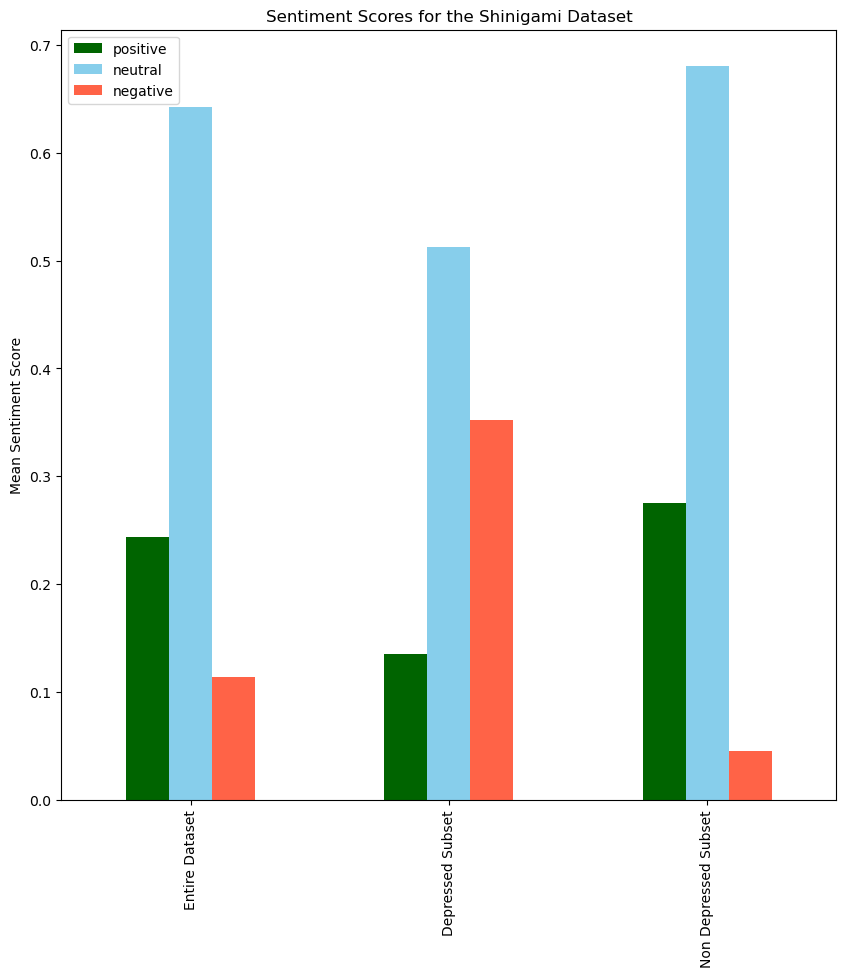

In [11]:
stop = stopwords.words('english')

df = pd.read_csv("./datasets/shinigami.csv", encoding="utf-8", sep=',')

df.rename(columns={'message to examine': 'text', 'label (depression result)': 'label'}, inplace=True)

# Remove stopwords from the dataset
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

non_depressed_df = df[df['label'] == 0]

analyzer = SentimentIntensityAnalyzer()

for index, row in non_depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    non_depressed_df.at[index, 'negative'] = sentiment['neg']
    non_depressed_df.at[index, 'neutral'] = sentiment['neu']
    non_depressed_df.at[index, 'positive'] = sentiment['pos']
    non_depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
non_depressed_negative_mean = non_depressed_df.loc[:, 'negative'].mean()
non_depressed_neutral_mean = non_depressed_df.loc[:, 'neutral'].mean()
non_depressed_positive_mean = non_depressed_df.loc[:, 'positive'].mean()
non_depressed_compound_mean = non_depressed_df.loc[:, 'compound'].mean()


depressed_df = df[df['label'] == 1]

for index, row in depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    depressed_df.at[index, 'negative'] = sentiment['neg']
    depressed_df.at[index, 'neutral'] = sentiment['neu']
    depressed_df.at[index, 'positive'] = sentiment['pos']
    depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the depressed dataset
depressed_negative_mean = depressed_df.loc[:, 'negative'].mean()
depressed_neutral_mean = depressed_df.loc[:, 'neutral'].mean()
depressed_positive_mean = depressed_df.loc[:, 'positive'].mean()
depressed_compound_mean = depressed_df.loc[:, 'compound'].mean()


all_data = df.copy()

for index, row in all_data.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    all_data.at[index, 'negative'] = sentiment['neg']
    all_data.at[index, 'neutral'] = sentiment['neu']
    all_data.at[index, 'positive'] = sentiment['pos']
    all_data.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
all_data_negative_mean = all_data.loc[:, 'negative'].mean()
all_data_neutral_mean = all_data.loc[:, 'neutral'].mean()
all_data_positive_mean = all_data.loc[:, 'positive'].mean()
all_data_compound_mean = all_data.loc[:, 'compound'].mean()


d = {'positive': [all_data_positive_mean,depressed_positive_mean, non_depressed_positive_mean],'neutral': [all_data_neutral_mean,depressed_neutral_mean, non_depressed_neutral_mean],'negative': [all_data_negative_mean,depressed_negative_mean, non_depressed_negative_mean],  'compound': [all_data_compound_mean, depressed_compound_mean, non_depressed_compound_mean]}

dataset_averages_df = pd.DataFrame(data=d, index=['Entire Dataset', 'Depressed Subset', 'Non Depressed Subset'])

ax = dataset_averages_df.plot.bar(y=['positive', 'neutral', 'negative'], figsize=[10,10], color = ['darkgreen', 'skyblue', 'tomato'])
ax.set_ylabel("Mean Sentiment Score");
ax.set_title('Sentiment Scores for the Shinigami Dataset');


C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\565929659.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'negative'] = sentiment['neg']
C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\565929659.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'neutral'] = sentiment['neu']
C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\565929659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

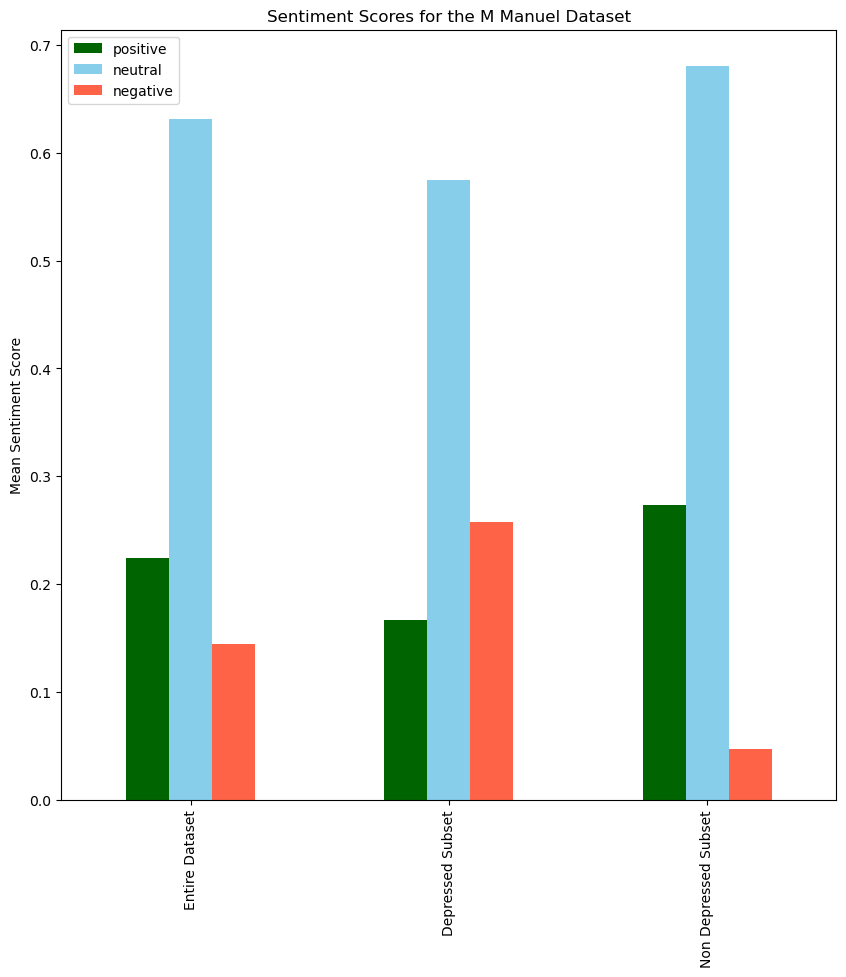

In [13]:
stop = stopwords.words('english')

df = pd.read_csv("./datasets/M_manuel_depression_detection.csv", encoding="utf-8", sep=',')

# Remove stopwords from the dataset
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

non_depressed_df = df[df['label'] == 0]

analyzer = SentimentIntensityAnalyzer()

for index, row in non_depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    non_depressed_df.at[index, 'negative'] = sentiment['neg']
    non_depressed_df.at[index, 'neutral'] = sentiment['neu']
    non_depressed_df.at[index, 'positive'] = sentiment['pos']
    non_depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
non_depressed_negative_mean = non_depressed_df.loc[:, 'negative'].mean()
non_depressed_neutral_mean = non_depressed_df.loc[:, 'neutral'].mean()
non_depressed_positive_mean = non_depressed_df.loc[:, 'positive'].mean()
non_depressed_compound_mean = non_depressed_df.loc[:, 'compound'].mean()


depressed_df = df[df['label'] == 1]

for index, row in depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    depressed_df.at[index, 'negative'] = sentiment['neg']
    depressed_df.at[index, 'neutral'] = sentiment['neu']
    depressed_df.at[index, 'positive'] = sentiment['pos']
    depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the depressed dataset
depressed_negative_mean = depressed_df.loc[:, 'negative'].mean()
depressed_neutral_mean = depressed_df.loc[:, 'neutral'].mean()
depressed_positive_mean = depressed_df.loc[:, 'positive'].mean()
depressed_compound_mean = depressed_df.loc[:, 'compound'].mean()


all_data = df.copy()

for index, row in all_data.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    all_data.at[index, 'negative'] = sentiment['neg']
    all_data.at[index, 'neutral'] = sentiment['neu']
    all_data.at[index, 'positive'] = sentiment['pos']
    all_data.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
all_data_negative_mean = all_data.loc[:, 'negative'].mean()
all_data_neutral_mean = all_data.loc[:, 'neutral'].mean()
all_data_positive_mean = all_data.loc[:, 'positive'].mean()
all_data_compound_mean = all_data.loc[:, 'compound'].mean()


d = {'positive': [all_data_positive_mean,depressed_positive_mean, non_depressed_positive_mean],'neutral': [all_data_neutral_mean,depressed_neutral_mean, non_depressed_neutral_mean],'negative': [all_data_negative_mean,depressed_negative_mean, non_depressed_negative_mean],  'compound': [all_data_compound_mean, depressed_compound_mean, non_depressed_compound_mean]}

dataset_averages_df = pd.DataFrame(data=d, index=['Entire Dataset', 'Depressed Subset', 'Non Depressed Subset'])

ax = dataset_averages_df.plot.bar(y=['positive', 'neutral', 'negative'], figsize=[10,10], color = ['darkgreen', 'skyblue', 'tomato'])
ax.set_ylabel("Mean Sentiment Score");
ax.set_title('Sentiment Scores for the M Manuel Dataset');

,positive,neutral,negative,compound
Depressed Subset,0.330614,0.6108,0.058579,0.535319
Non Depressed Subset,0.330614,0.6108,0.058579,0.535319
Entire Dataset,0.330614,0.6108,0.058579,0.535319


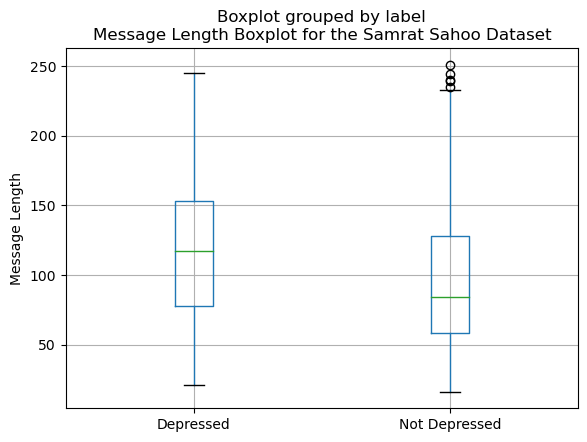

In [6]:
df1 = df.copy()

df1['label'] = df['label'].replace({1: 'Depressed', 0: 'Not Depressed'})

df1['Message Size'] = df1['text'].apply(lambda x : len(x))

ax = df1.boxplot(by='label', column='Message Size' )

ax.set_ylabel('Message Length')
ax.set_xlabel('');
ax.set_title('Message Length Boxplot for the Samrat Sahoo Dataset');

In [19]:
!pip install NRCLex

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 435.7 kB/s eta 0:00:02
     -- ---------------------------------- 41.0/636.8 kB 326.8 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/636.8 kB 655.4 kB/s eta 0:00:01
     ----- ------------------------------- 92.2/636.8 kB 655.4 kB/s eta 0:00:01
     ---------- ------------------------- 194.6/636.8 kB 841.6 kB/s eta 0:00:01
     --------------- -------------------- 266.2/636.8 kB 962.4 kB/s eta 0:00:01
     ------------------- ------------------ 327.7/636.8 kB 1.0 MB/s eta 0:00:01
     ------------------------ ------------- 409.6/636.8 kB 1.1 MB/s eta 0:00:01
     -------------------------------- ----- 542.7/636.8 kB 1.3 MB/s eta 0:00:01
     ----------------------------------- -- 593.9/636.8 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 636.8/636

In [50]:

from nrclex import NRCLex


df['fear'] = df['text'].apply(lambda x : NRCLex(x).raw_emotion_scores.get('fear',0))

df['anger'] = df['text'].apply(lambda x : NRCLex(x).raw_emotion_scores.get('anger',0))

df['anticipation'] = df['text'].apply(lambda x : NRCLex(x).raw_emotion_scores.get('anticipation',0))

df['trust'] = df['text'].apply(lambda x : NRCLex(x).raw_emotion_scores.get('trust',0))

df['surprise'] = df['text'].apply(lambda x : NRCLex(x).raw_emotion_scores.get('surprise',0))

df['positive'] = df['text'].apply(lambda x : NRCLex(x).raw_emotion_scores.get('positive',0))

df['negative'] = df['text'].apply(lambda x : NRCLex(x).raw_emotion_scores.get('negative',0))

df['sadness'] = df['text'].apply(lambda x : NRCLex(x).raw_emotion_scores.get('sadness',0))

df['disgust'] = df['text'].apply(lambda x : NRCLex(x).raw_emotion_scores.get('disgust',0))

df['joy'] = df['text'].apply(lambda x : NRCLex(x).raw_emotion_scores.get('joy',0))


for index, row in df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    df.at[index, 'negative'] = sentiment['neg']
    df.at[index, 'neutral'] = sentiment['neu']
    df.at[index, 'positive'] = sentiment['pos']
    df.at[index, 'compound'] = sentiment['compound']



NameError: name 'analyzer' is not defined

array([[<Axes: title={'center': 'anger'}, xlabel='[label]'>,
        <Axes: title={'center': 'anticipation'}, xlabel='[label]'>,
        <Axes: title={'center': 'disgust'}, xlabel='[label]'>],
       [<Axes: title={'center': 'fear'}, xlabel='[label]'>,
        <Axes: title={'center': 'joy'}, xlabel='[label]'>,
        <Axes: title={'center': 'negative'}, xlabel='[label]'>],
       [<Axes: title={'center': 'positive'}, xlabel='[label]'>,
        <Axes: title={'center': 'sadness'}, xlabel='[label]'>,
        <Axes: title={'center': 'surprise'}, xlabel='[label]'>],
       [<Axes: title={'center': 'trust'}, xlabel='[label]'>, <Axes: >,
        <Axes: >]], dtype=object)

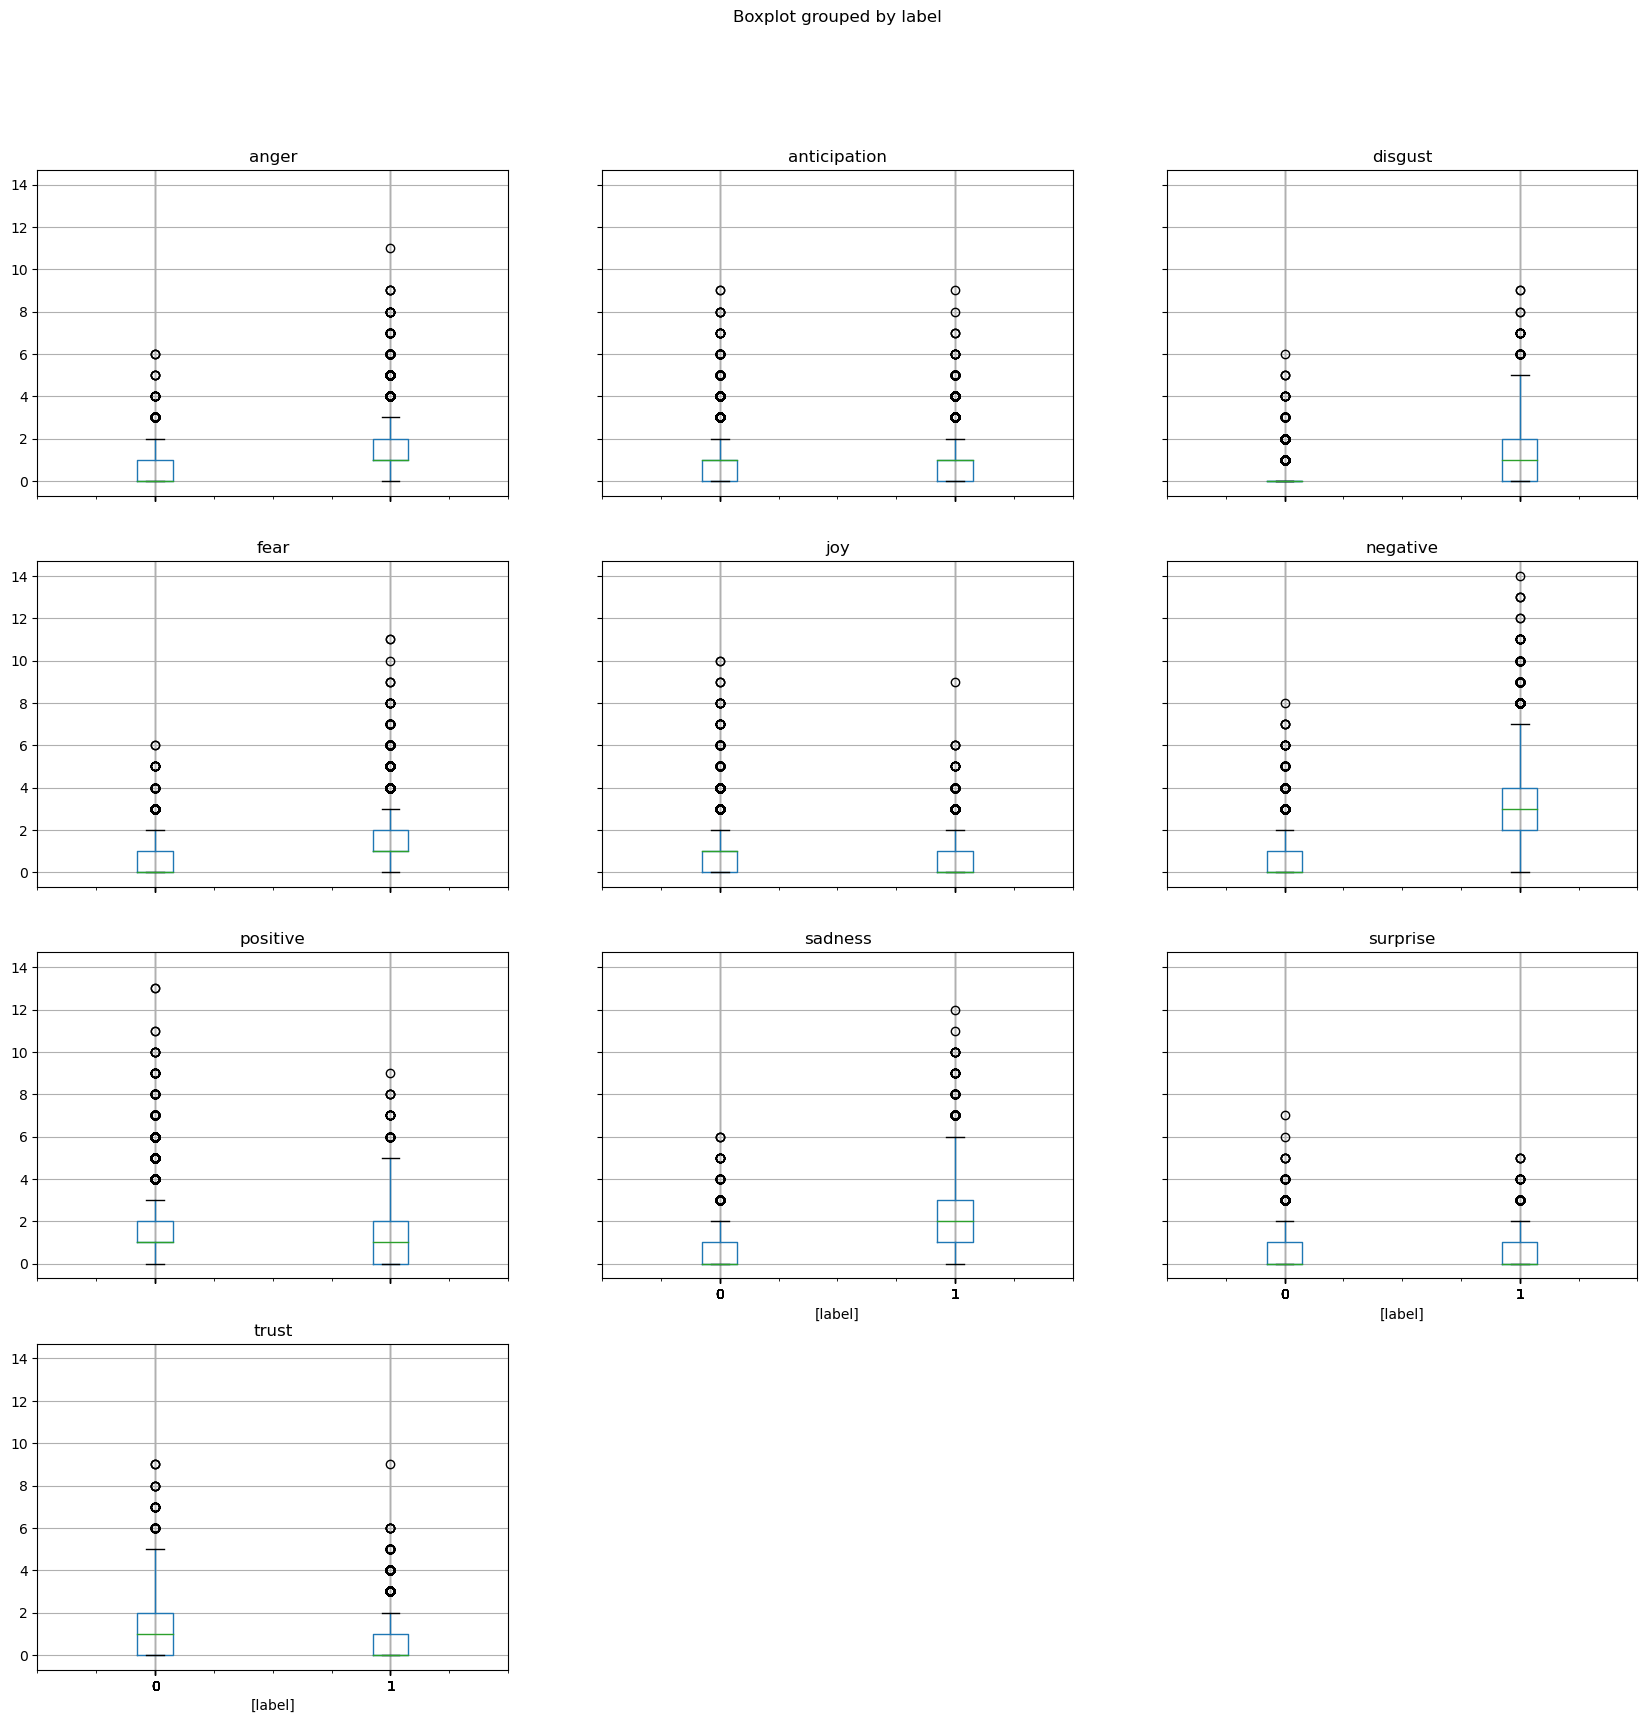

In [49]:

df1.boxplot(by='label', figsize=[20,20])